# Importing some libraries

In [187]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [188]:
listings=pd.read_csv("listings.small.csv")

In [189]:
reviews=pd.read_csv("reviews.small.csv")

In [190]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,NaN,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,2015-05-19,0.07,1,0
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,NaN,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,NaN,1,0
2,2725029,Nice appartment in Batignolles,13945253,Vincent,NaN,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,2015-10-10,0.11,1,298
3,9337509,Charming flat near Batignolles,5107123,Julie,NaN,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,2015-12-15,0.15,1,364
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,NaN,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2016-06-17,2.00,1,89


In [5]:
reviews.head()

,listing_id,date
0,12007141,2016-04-16
1,12007141,2016-04-26
2,12007141,2016-05-03
3,12007141,2016-06-15
4,6666099,2015-06-21


# 1. EXPLORATORY DATA ANALYSIS

In [15]:
listings.shape

(52725, 16)

In [16]:
reviews.shape

(663599, 2)

In [17]:
# Number of variables for each data type
listings.dtypes.value_counts()

int64      7
object     5
float64    4
dtype: int64

<AxesSubplot:ylabel='None'>

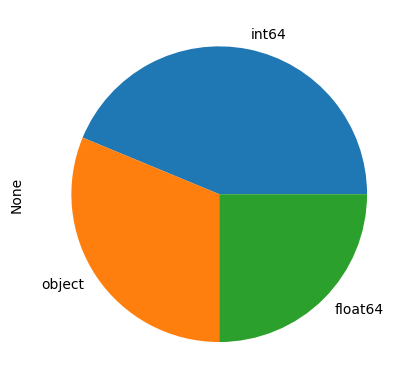

In [9]:
# Visualization of data types proportion
listings.dtypes.value_counts().plot.pie()

# Missing values

In [18]:
listings.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52720,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
52721,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
52722,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
52723,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False


<AxesSubplot:>

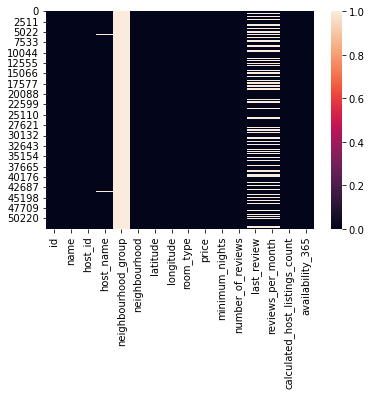

In [19]:
sns.heatmap(listings.isna())

<AxesSubplot:>

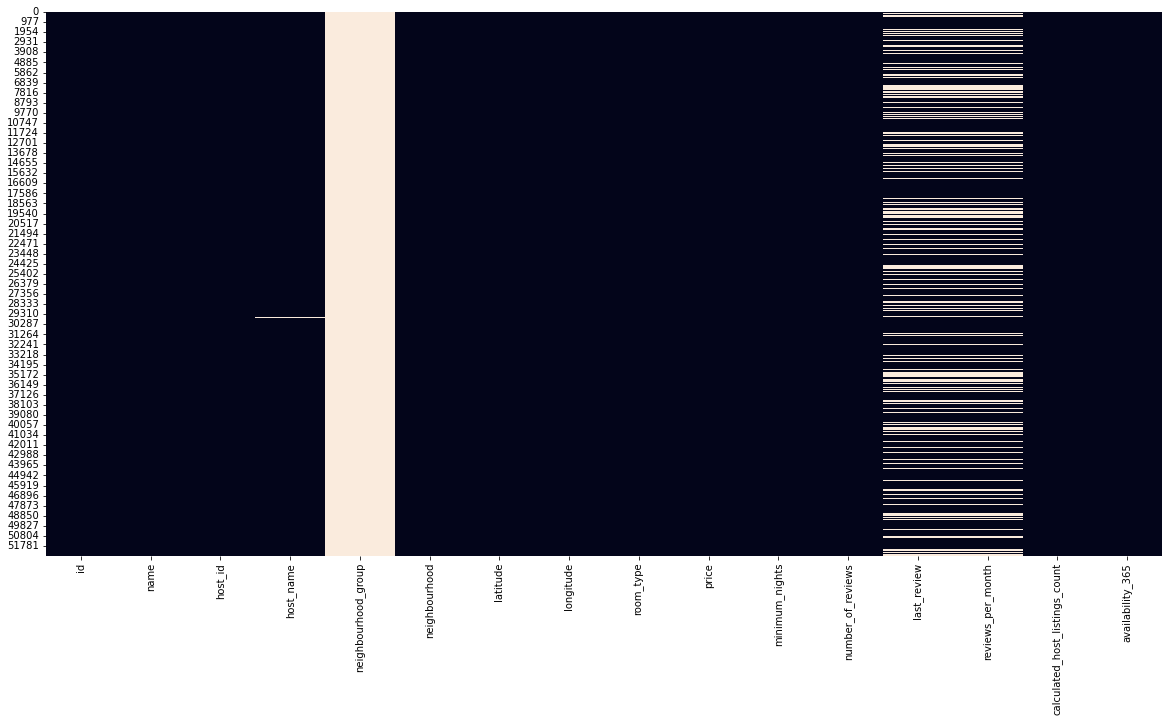

In [20]:
# Visualisation of the entire dataset
# Notice: Columns in brown contain nan values
plt.figure(figsize=(20, 10))
sns.heatmap(listings.isna(), cbar=False)

In [21]:
# Percentage of nan values in each column
(listings.isna().sum()/listings.shape[0]).sort_values(ascending=True)

id                                0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
host_name                         0.000872
reviews_per_month                 0.275164
last_review                       0.275183
neighbourhood_group               1.000000
dtype: float64

Notice : Variables 'host_name', 'reviews_per_month', 'last_review' and 'neighbourhood_group' contain nan values  

In [22]:
# Let's keep columns with percentage of nan values less than 0.8
listings = listings[listings.columns[(listings.isna().sum()/listings.shape[0]) < 0.8]]

In [23]:
listings.shape

(52725, 15)

In [24]:
print('Notice : 1 variables has been deleted')

Notice : 1 variables has been deleted


In [25]:
# Checking nan values percentages
(listings.isna().sum()/listings.shape[0]).sort_values(ascending=True)

id                                0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
host_name                         0.000872
reviews_per_month                 0.275164
last_review                       0.275183
dtype: float64

<AxesSubplot:>

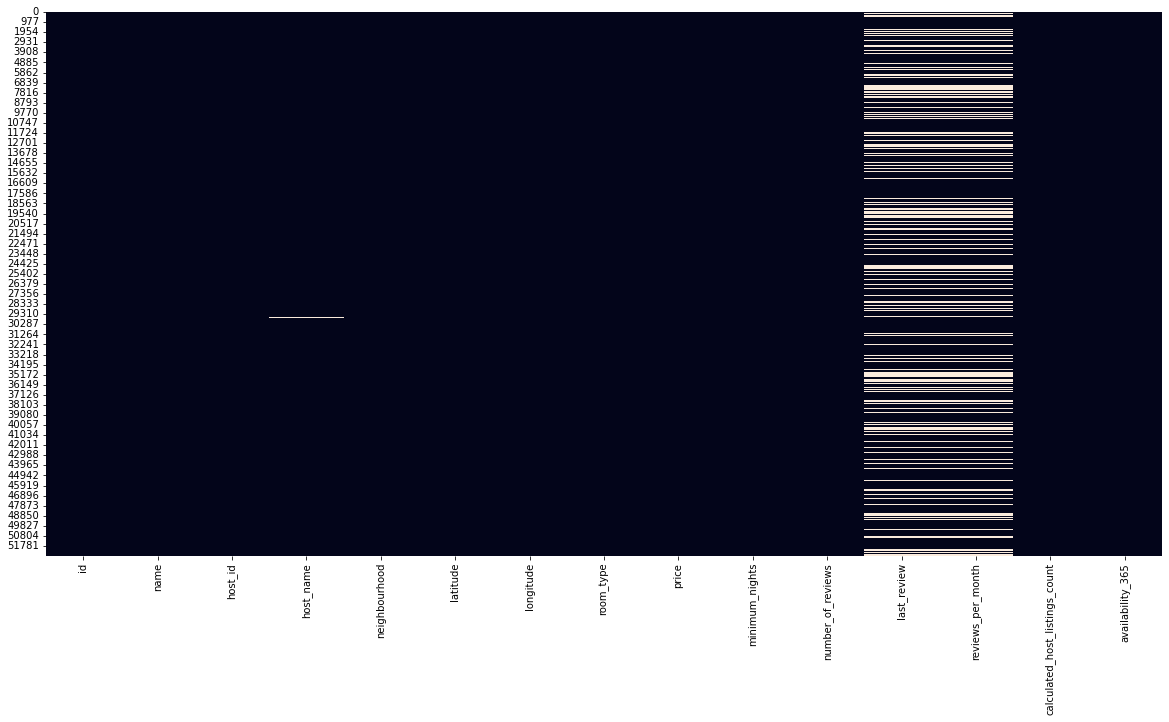

In [26]:
# The dataset after filtering columns
plt.figure(figsize=(20, 10))
sns.heatmap(listings.isna(), cbar=False)

# OUTLIERS

In [82]:
listings1  = listings.copy() 
listings1.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,2015-05-19,0.07,1,0
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,NaN,1,0
2,2725029,Nice appartment in Batignolles,13945253,Vincent,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,2015-10-10,0.11,1,298
3,9337509,Charming flat near Batignolles,5107123,Julie,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,2015-12-15,0.15,1,364
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2016-06-17,2.00,1,89


In [83]:
#  Delete 1 variables
listings1 = listings1.drop(['last_review'], axis = 1)
listings1.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,0.07,1,0
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,1,0
2,2725029,Nice appartment in Batignolles,13945253,Vincent,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,0.11,1,298
3,9337509,Charming flat near Batignolles,5107123,Julie,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,0.15,1,364
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2.00,1,89


In [88]:
# Split the data into numeric and categorical features

numeric_features = [f for f, t in zip(listings1.columns, listings1.dtypes) if t in ['int64','float64']]

In [89]:
numeric_features

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [90]:
categorical_features = [f for f in listings1.columns if f not in numeric_features]

In [91]:
categorical_features

['name', 'host_name', 'neighbourhood', 'room_type']

In [92]:
# Build ML pipeline for Local Outlier Factor model so as to identify outliers
from sklearn.neighbors import LocalOutlierFactor
numeric_transformer = Pipeline(steps=[
    
                                      ('normal', (StandardScaler())),
                                    
                                      ('imputer', SimpleImputer(strategy='median'))
                           
                          ])

categorical_transformer = Pipeline(steps=[
    
                                          ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=True)),
    ('imputer2', SimpleImputer(strategy='most_frequent'))
                           
                          ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[ 
                            ('preprocessor3', preprocessor),
                          
                           ('predictor', LocalOutlierFactor())
                           
                          ])

In [93]:
pipeline.fit(listings1)

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normal',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['id', 'host_id', 'latitude',
                                                   'longitude', 'price',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['name', 'host_name',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('predictor', LocalOutlierFactor())])

In [98]:
anomlof = pipeline.fit_predict(listings1)

In [99]:
outliers_df = listings1.copy()
outliers_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,0.07,1,0
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,1,0
2,2725029,Nice appartment in Batignolles,13945253,Vincent,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,0.11,1,298
3,9337509,Charming flat near Batignolles,5107123,Julie,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,0.15,1,364
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2.00,1,89


In [100]:
outliers_df['outliers'] = anomlof
outliers_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,outliers
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,0.07,1,0,1
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,1,0,1
2,2725029,Nice appartment in Batignolles,13945253,Vincent,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,0.11,1,298,1
3,9337509,Charming flat near Batignolles,5107123,Julie,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,0.15,1,364,1
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2.00,1,89,1


In [101]:
outliers_df['outliers'].value_counts()

 1    52711
-1       14
Name: outliers, dtype: int64

Notice : This dataframe contains 14 outliers

# Histograms for continuous variables

In [30]:
# Different float variables
for col in listings.select_dtypes('float64'):
    print(col)

latitude
longitude
reviews_per_month


<Figure size 432x288 with 0 Axes>

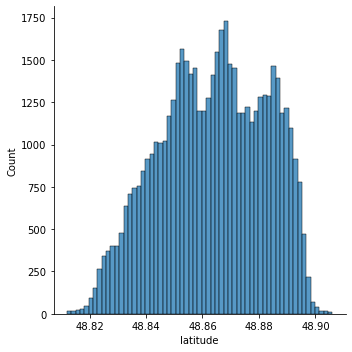

<Figure size 432x288 with 0 Axes>

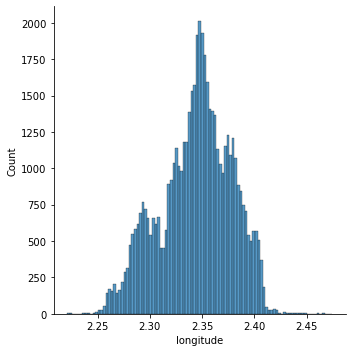

<Figure size 432x288 with 0 Axes>

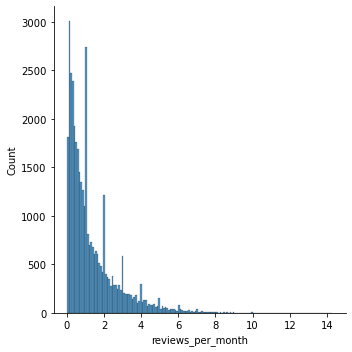

In [31]:
# Plotting histograms of float variables
for col in listings.select_dtypes('float64'):
    plt.figure()
    sns.displot(listings[col])

In [24]:
print('Notice:Given that the above distributions are not centered in 0\nwe may confirm the float variables are not standardized')

Notice:Given that the above distributions are not centered in 0
we may confirm the float variables are not standardized


In [33]:
# Different int variables
for col in listings.select_dtypes('int64'):
    print(col)

id
host_id
price
minimum_nights
number_of_reviews
calculated_host_listings_count
availability_365


<Figure size 432x288 with 0 Axes>

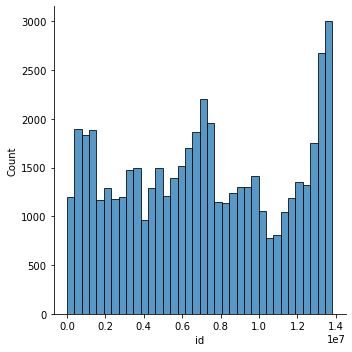

<Figure size 432x288 with 0 Axes>

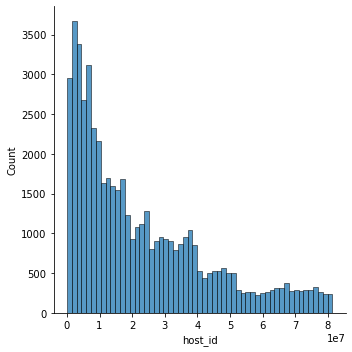

<Figure size 432x288 with 0 Axes>

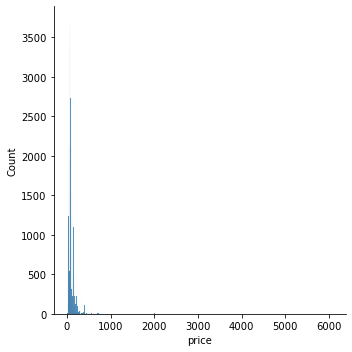

<Figure size 432x288 with 0 Axes>

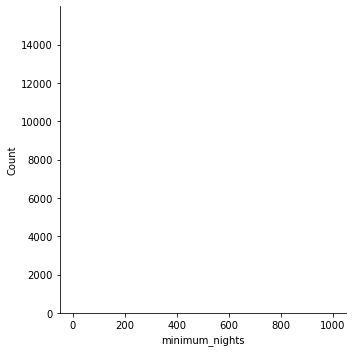

<Figure size 432x288 with 0 Axes>

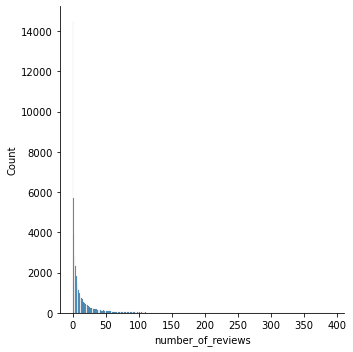

<Figure size 432x288 with 0 Axes>

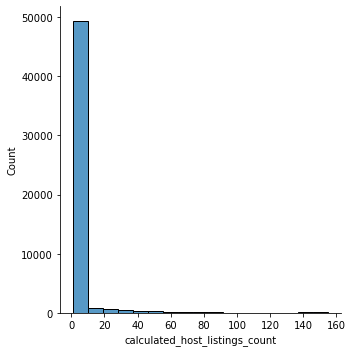

<Figure size 432x288 with 0 Axes>

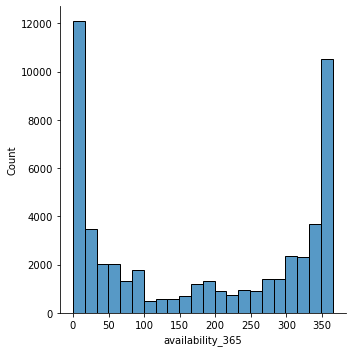

In [34]:
# Plotting histograms of int variables
for col in listings.select_dtypes('int64'):
    plt.figure()
    sns.displot(listings[col])

In [35]:
print('Notice:Given that the above distributions are not centered in 0\nwe may confirm the int variables are not standardized')

Notice:Given that the above distributions are not centered in 0
we may confirm the int variables are not standardized


# Qualitative variables

In [36]:
# Displaying contents of each qualitative variables
for col in listings.select_dtypes('object'):
    print(f'{col:-<20} {listings[col].unique()}')

name---------------- ['Appartement 60m2 Rue Legendre 75017'
 "Appart au pied de l'arc de triomphe" 'Nice appartment in Batignolles'
 ... 'Double rooms in 90m2 flat + balcony close to Paris'
 'APPARTMENT A IL DE FRANCE ( NEER PARIS)' 'F2 en bordure de Paris']
host_name----------- ['Matthieu' 'Claire' 'Vincent' ... 'Helman' 'Maïté & Nicolas' 'Naïre']
neighbourhood------- ['Batignolles-Monceau' 'Palais-Bourbon' 'Buttes-Chaumont' 'Opéra'
 'Entrepôt' 'Gobelins' 'Vaugirard' 'Reuilly' 'Louvre' 'Luxembourg'
 'Élysée' 'Temple' 'Ménilmontant' 'Panthéon' 'Passy' 'Observatoire'
 'Popincourt' 'Bourse' 'Buttes-Montmartre' 'Hôtel-de-Ville']
room_type----------- ['Entire home/apt' 'Private room' 'Shared room']
last_review--------- ['2015-05-19' nan '2015-10-10' ... '2014-02-06' '2012-05-28' '2015-01-21']


# Exploring the relationships between variables 

In [38]:
# Pairwise correlation between quantitative variables
listings.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.596453,-0.028063,-0.037022,-0.065670,-0.044603,-0.401893,0.263105,-0.026747,-0.215381
host_id,0.596453,1.000000,-0.051608,-0.045682,-0.061263,-0.027518,-0.233452,0.211031,-0.122364,-0.135731
latitude,-0.028063,-0.051608,1.000000,0.078139,-0.048125,-0.004173,-0.005561,-0.029362,-0.035810,0.007411
longitude,-0.037022,-0.045682,0.078139,1.000000,-0.147700,-0.002011,0.010360,-0.035627,-0.047441,-0.048662
price,-0.065670,-0.061263,-0.048125,-0.147700,1.000000,0.009766,-0.010473,-0.077854,0.214818,0.130332
minimum_nights,-0.044603,-0.027518,-0.004173,-0.002011,0.009766,1.000000,-0.027143,-0.064564,0.030978,-0.014827
number_of_reviews,-0.401893,-0.233452,-0.005561,0.010360,-0.010473,-0.027143,1.000000,0.497596,-0.045405,0.169609
reviews_per_month,0.263105,0.211031,-0.029362,-0.035627,-0.077854,-0.064564,0.497596,1.000000,-0.060358,0.065999
calculated_host_listings_count,-0.026747,-0.122364,-0.035810,-0.047441,0.214818,0.030978,-0.045405,-0.060358,1.000000,0.099722
availability_365,-0.215381,-0.135731,0.007411,-0.048662,0.130332,-0.014827,0.169609,0.065999,0.099722,1.000000


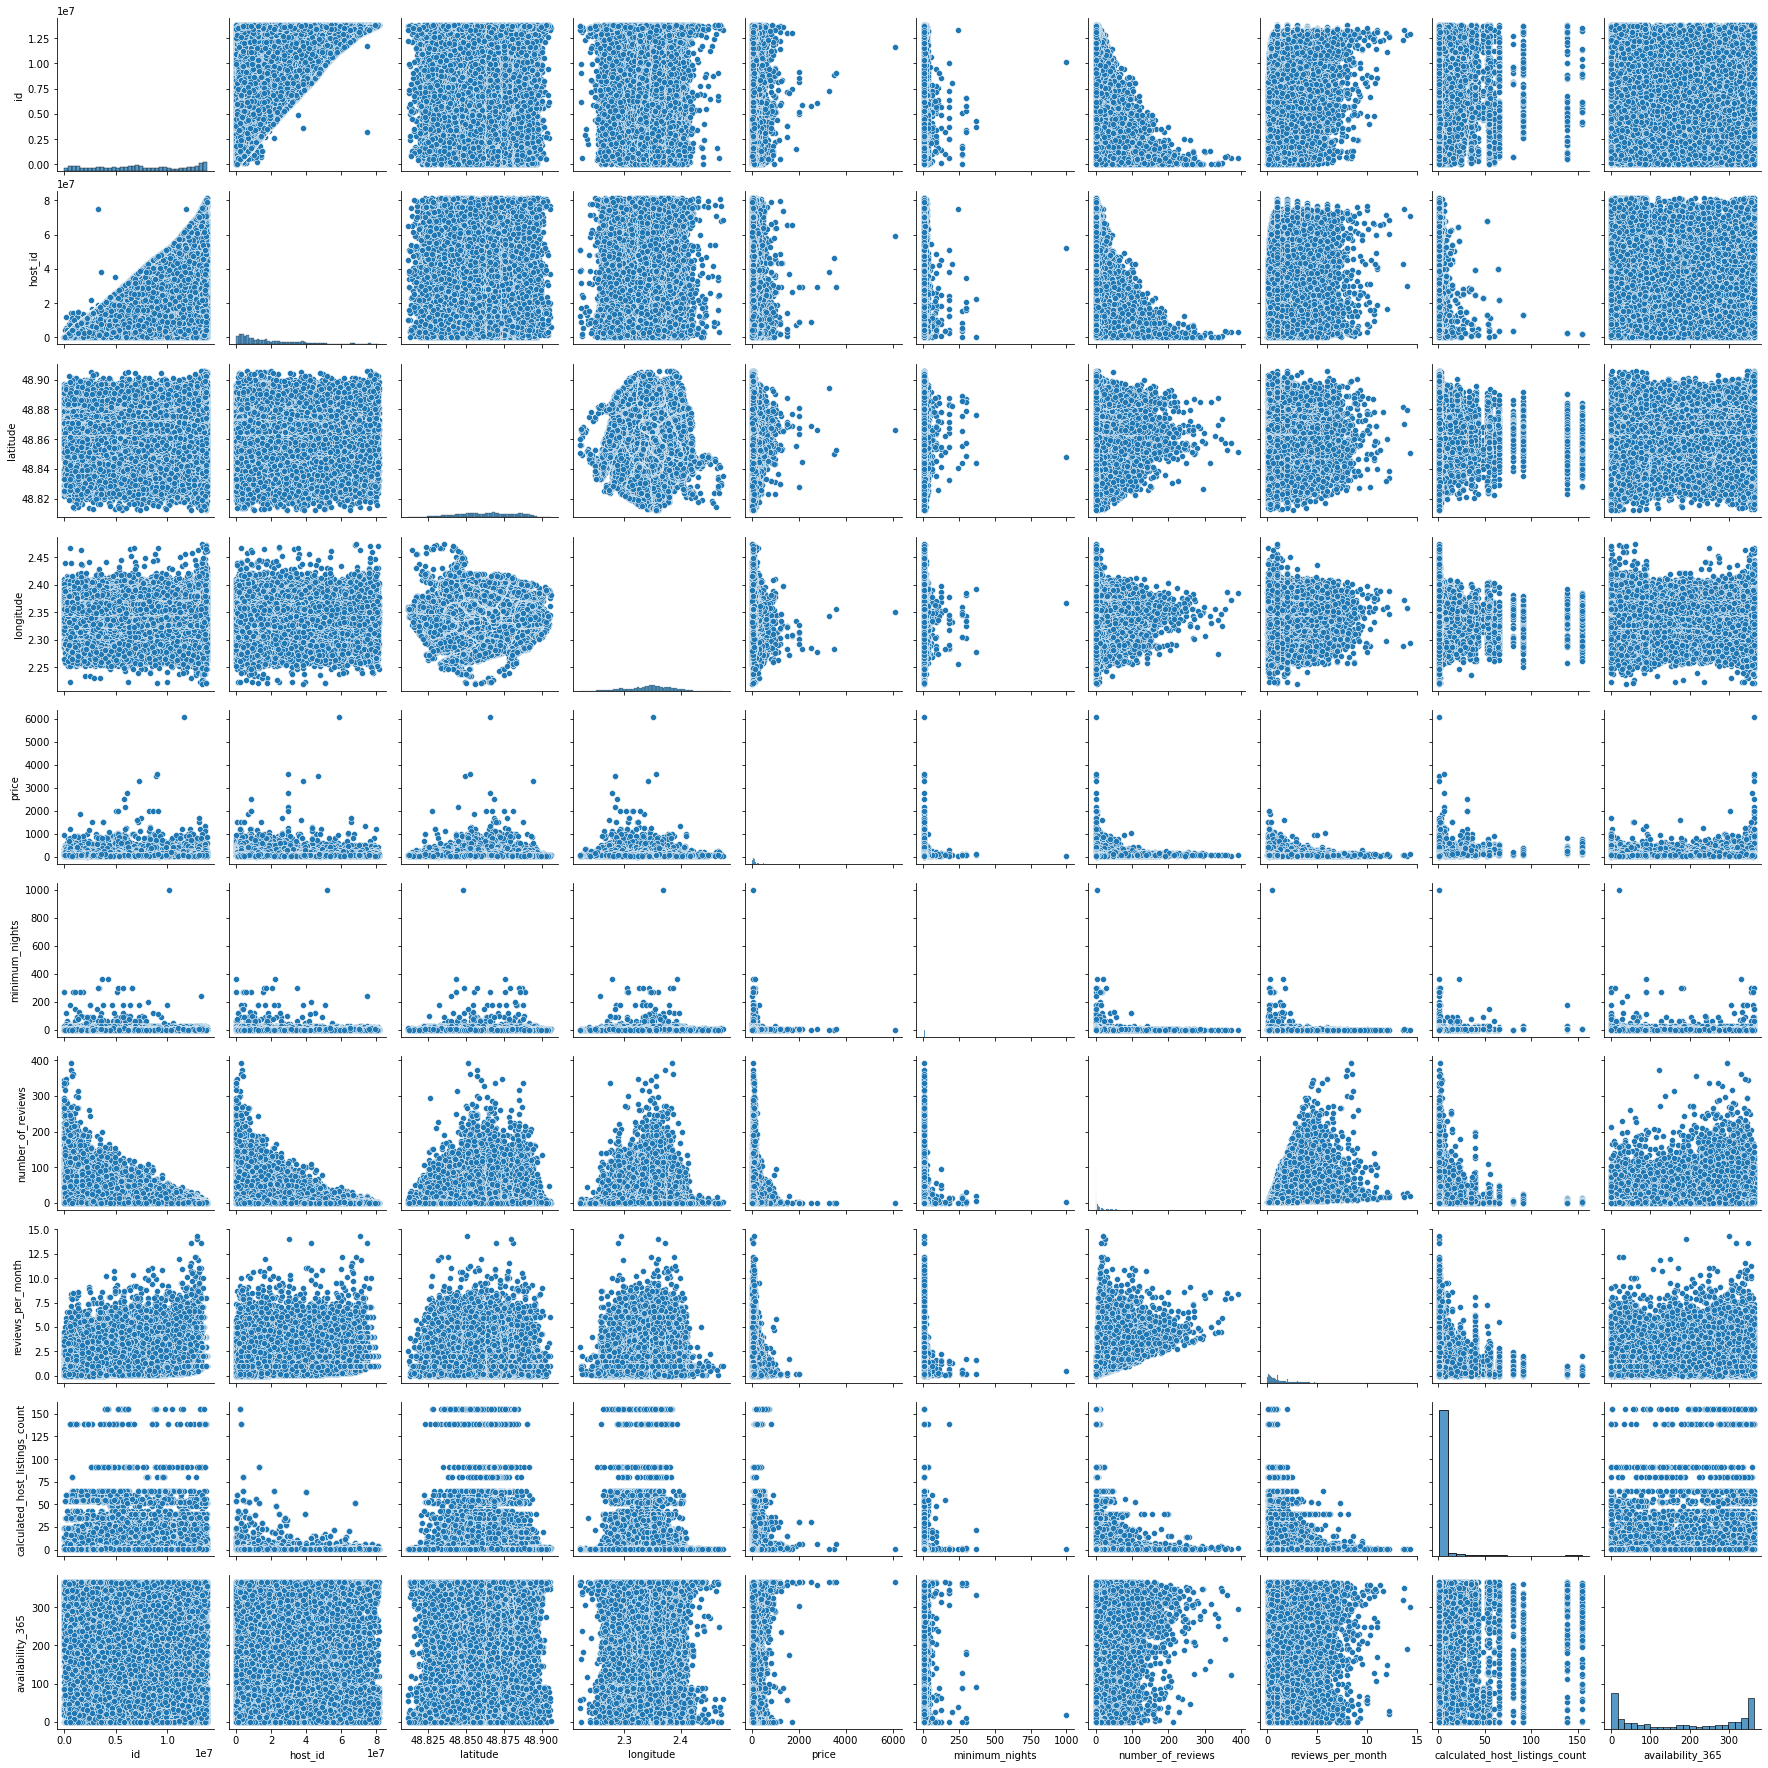

In [37]:
# Relationships between variables
sns.pairplot(listings)

<AxesSubplot:>

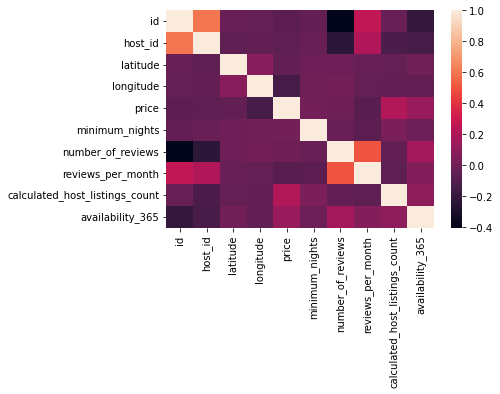

In [39]:
sns.heatmap(listings.corr())

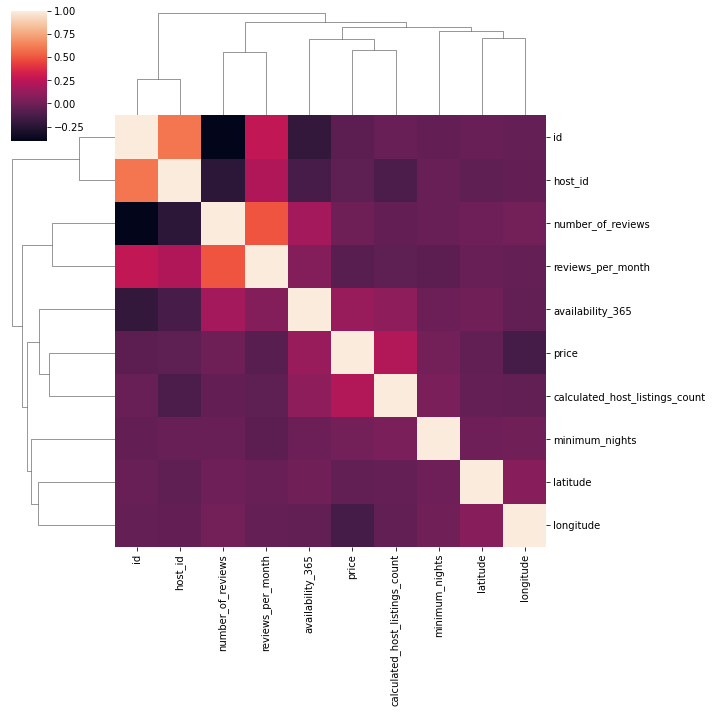

In [40]:
sns.clustermap(listings.corr())

In [41]:
# Target variable values
listings['price'].value_counts()

60     3055
50     3047
70     2787
80     2598
100    2073
       ... 
649       1
324       1
368       1
612       1
436       1
Name: price, Length: 498, dtype: int64

In [42]:
# Values in terms of percentages
listings['price'].value_counts(normalize=True)

60     0.057942
50     0.057790
70     0.052859
80     0.049275
100    0.039317
         ...   
649    0.000019
324    0.000019
368    0.000019
612    0.000019
436    0.000019
Name: price, Length: 498, dtype: float64

In [102]:
listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,2015-05-19,0.07,1,0
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,NaN,1,0
2,2725029,Nice appartment in Batignolles,13945253,Vincent,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,2015-10-10,0.11,1,298
3,9337509,Charming flat near Batignolles,5107123,Julie,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,2015-12-15,0.15,1,364
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2016-06-17,2.00,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52720,7184490,"Spacieux, lumineux et neuf",7212817,Delphine,Ménilmontant,48.851875,2.419683,Entire home/apt,88,1,2,2015-08-20,0.18,1,359
52721,13742629,Cosy Flat with Balcony 10min from Champs Elysées,4230636,Roxane,Batignolles-Monceau,48.891967,2.287698,Entire home/apt,80,1,1,2016-07-03,1.00,1,65
52722,13346291,Double rooms in 90m2 flat + balcony close to P...,75628675,Milo,Ménilmontant,48.852978,2.421014,Private room,64,5,0,NaN,NaN,1,200
52723,13067536,APPARTMENT A IL DE FRANCE ( NEER PARIS),70212270,Junghyun,Ménilmontant,48.866562,2.416304,Entire home/apt,63,3,0,NaN,NaN,2,53


# Number of apartments per owner

In [33]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4867396,Appartement 60m2 Rue Legendre 75017,9703910,Matthieu,Batignolles-Monceau,48.888800,2.320466,Entire home/apt,60,1,1,2015-05-19,0.07,1,0
1,7704653,Appart au pied de l'arc de triomphe,35777602,Claire,Batignolles-Monceau,48.876636,2.293724,Entire home/apt,200,1,0,NaN,NaN,1,0
2,2725029,Nice appartment in Batignolles,13945253,Vincent,Batignolles-Monceau,48.883836,2.321031,Entire home/apt,80,3,1,2015-10-10,0.11,1,298
3,9337509,Charming flat near Batignolles,5107123,Julie,Batignolles-Monceau,48.892360,2.322338,Entire home/apt,60,2,1,2015-12-15,0.15,1,364
4,12928158,Spacious bedroom near the centre of Paris,51195601,Daniele,Batignolles-Monceau,48.889417,2.298321,Private room,50,1,2,2016-06-17,2.00,1,89


In [151]:
new_df = listings[["host_name", "name"]]

In [152]:
new_df.head()

,host_name,name
0,Matthieu,Appartement 60m2 Rue Legendre 75017
1,Claire,Appart au pied de l'arc de triomphe
2,Vincent,Nice appartment in Batignolles
3,Julie,Charming flat near Batignolles
4,Daniele,Spacious bedroom near the centre of Paris


In [153]:
df = new_df.groupby(['host_name'])


In [154]:
df.first()

,name
host_name,
(EMAIL HIDDEN),Nice Confortable and totaly equiped
(URL HIDDEN)Α,Calm and luminous
(Url Hidden)HIDDENHIDDEN,Bedroom in the 13th district
1 Rue Affre,"31m2/2rooms - Cosy, bright, popular"
2691lilou,Duplex cosy
...,...
수연,파리모나미2
수일,영화배우 박수일이 직접 운영하는 빠리 콘도형 게스트하우스입니다.
예빈(Ye-Bin),paris studio (파리 스튜디오 단기 임대)


In [155]:
df.count()

,name
host_name,
(EMAIL HIDDEN),23
(URL HIDDEN)Α,3
(Url Hidden)HIDDENHIDDEN,1
1 Rue Affre,1
2691lilou,1
...,...
수연,2
수일,2
예빈(Ye-Bin),1


# Renting price per city quarter

In [135]:
new_df2 = listings[['neighbourhood', "price"]]
new_df2 .head()

,neighbourhood,price
0,Batignolles-Monceau,60
1,Batignolles-Monceau,200
2,Batignolles-Monceau,80
3,Batignolles-Monceau,60
4,Batignolles-Monceau,50


In [149]:
df2 = new_df2.groupby(['neighbourhood']).agg(["min", "max", "mean"])

In [150]:
df2

price                  
                      min   max        mean
neighbourhood                              
Batignolles-Monceau    17  2004   88.625590
Bourse                 21  6081  118.325639
Buttes-Chaumont        10  1002   66.539683
Buttes-Montmartre      14  3306   74.784066
Entrepôt               10   451   81.292556
Gobelins               12  1129   74.245876
Hôtel-de-Ville         19  3608  135.476923
Louvre                 12   852  138.712094
Luxembourg             20  1874  145.288035
Ménilmontant           13  1352   66.239832
Observatoire            0  2004   84.961179
Opéra                  15  1253   99.646253
Palais-Bourbon          0  1285  140.209938
Panthéon               13  1257  115.262519
Passy                  17  2765  125.311646
Popincourt             16   922   79.495392
Reuilly                12   915   77.784753
Temple                 19   802  117.338579
Vaugirard               9  3506   91.373904
Élysée                 19  2004  167.777778

# 2. Modeling

In [311]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
# listings1 DataFrame does not contains last_review variable which is a date

In [358]:
# Split the data intro train and test set
X = listings1.drop('price', axis =1)
y= listings1['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=2022)

In [370]:
# separate categorical and numerical features
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['float', 'int']).columns.tolist()

In [371]:
numeric_transformer = Pipeline(steps=[
    
                                      ('normal', (RobustScaler())),
                                    
                                      ('imputer', SimpleImputer(strategy='mean'))
                           
                          ])

categorical_transformer = Pipeline(steps=[
    
                                          ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=True)),
    ('imputer2', SimpleImputer(strategy='most_frequent'))
                           
                          ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])



In [372]:
LR_pipeline = Pipeline(steps=[ 
                            ('preprocessor3', preprocessor),
    ('predictor1', LinearRegression())
                           
                          ])
LR_pipeline

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normal',
                                                                   RobustScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['id', 'host_id', 'latitude',
                                                   'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['name', 'host_name',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('predictor1', LinearRegression())])

In [373]:
DT_pipeline = Pipeline(steps=[ 
                            ('preprocessor3', preprocessor),
    ('predictor2', DecisionTreeRegressor())
                           
                          ])
DT_pipeline

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normal',
                                                                   RobustScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['id', 'host_id', 'latitude',
                                                   'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['name', 'host_name',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('predictor2', DecisionTreeRegressor())])

In [374]:
KNN_pipeline = Pipeline(steps=[ 
                            ('preprocessor3', preprocessor),
    ('predictor3', KNeighborsRegressor())
                           
                          ])
KNN_pipeline

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normal',
                                                                   RobustScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['id', 'host_id', 'latitude',
                                                   'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['name', 'host_name',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('predictor3', KNeighborsRegressor())])

In [375]:
SVR_pipeline = Pipeline(steps=[ 
                            ('preprocessor3', preprocessor),
    ('predictor4', SVR())
                           
                          ])
SVR_pipeline

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normal',
                                                                   RobustScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['id', 'host_id', 'latitude',
                                                   'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['name', 'host_name',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('predictor4', SVR())])

# Stacking

In [376]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ("Linear Regression", LR_pipeline),
    ("Decision Tree", DT_pipeline),
    ("K-Nearest", KNN_pipeline),
    ("SVR", SVR_pipeline)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking_regressor

StackingRegressor(estimators=[('Linear Regression',
                               Pipeline(steps=[('preprocessor3',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('normal',
                                                                                                  RobustScaler()),
                                                                                                 ('imputer',
                                                                                                  SimpleImputer())]),
                                                                                 ['id',
                                                                                  'host_id',
                                                                                  'latitude',
                                                                                  'longitude',
                                                                                  'minimum_nights',
                                                                                  'number_of_reviews',
                                                                                  'reviews_per_month',
                                                                                  'calculated_host_listings_count',
                                                                                  'availability_365']),
                                                                                ('cat'...
                                                                                  'minimum_nights',
                                                                                  'number_of_reviews',
                                                                                  'reviews_per_month',
                                                                                  'calculated_host_listings_count',
                                                                                  'availability_365']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('encoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore')),
                                                                                                 ('imputer2',
                                                                                                  SimpleImputer(strategy='most_frequent'))]),
                                                                                 ['name',
                                                                                  'host_name',
                                                                                  'neighbourhood',
                                                                                  'room_type'])])),
                                               ('predictor4', SVR())]))],
                  final_estimator=RandomForestRegressor())

In [377]:
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('Linear Regression',
                               Pipeline(steps=[('preprocessor3',
                                                ColumnTransformer(transformers=[('num',
                                                                                 Pipeline(steps=[('normal',
                                                                                                  RobustScaler()),
                                                                                                 ('imputer',
                                                                                                  SimpleImputer())]),
                                                                                 ['id',
                                                                                  'host_id',
                                                                                  'latitude',
                                                                                  'longitude',
                                                                                  'minimum_nights',
                                                                                  'number_of_reviews',
                                                                                  'reviews_per_month',
                                                                                  'calculated_host_listings_count',
                                                                                  'availability_365']),
                                                                                ('cat'...
                                                                                  'minimum_nights',
                                                                                  'number_of_reviews',
                                                                                  'reviews_per_month',
                                                                                  'calculated_host_listings_count',
                                                                                  'availability_365']),
                                                                                ('cat',
                                                                                 Pipeline(steps=[('encoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore')),
                                                                                                 ('imputer2',
                                                                                                  SimpleImputer(strategy='most_frequent'))]),
                                                                                 ['name',
                                                                                  'host_name',
                                                                                  'neighbourhood',
                                                                                  'room_type'])])),
                                               ('predictor4', SVR())]))],
                  final_estimator=RandomForestRegressor())

In [380]:
y_pred = stacking_regressor.predict(X_test) 

In [381]:
y_pred 

array([ 56.69, 145.71,  91.55, ...,  98.66,  73.67,  89.85])

# Model Evaluation

In [388]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [389]:
# evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 6154.003795078235
Root Mean Squared Error: 78.44745881848714
Mean Absolute Error: 39.99538833570413
R-squared: 0.15993563902042163
